In [1]:
"""
   DWF Python Example
   Author:  Digilent, Inc.
   Revision:  2018-07-19

   Requires:                       
       Python 2.7, 3
"""
#load things
from ctypes import *
from dwfconstants import *
import math
import time
import matplotlib.pyplot as plt
import sys
import numpy as np
import csv
import os
import multiprocessing 
import save_functions as sf

if sys.platform.startswith("win"):
    dwf = cdll.dwf
elif sys.platform.startswith("darwin"):
    dwf = cdll.LoadLibrary("/Library/Frameworks/dwf.framework/dwf")
else:
    dwf = cdll.LoadLibrary("libdwf.so")

#declare ctype variables
hdwf = c_int()
sts = c_byte()

dwf.FDwfParamSet(DwfParamOnClose, c_int(0)) # 0 = run, 1 = stop, 2 = shutdown

#print(DWF version
version = create_string_buffer(16)
dwf.FDwfGetVersion(version)
print("DWF Version: "+str(version.value))


#open device
print("Opening first device")
dwf.FDwfDeviceOpen(c_int(-1), byref(hdwf))


if hdwf.value == hdwfNone.value:
    szerr = create_string_buffer(512)
    dwf.FDwfGetLastErrorMsg(szerr)
    print(str(szerr.value))
    print("failed to open device")
    quit()

   
dwf.FDwfDeviceAutoConfigureSet(hdwf, c_int(0)) # 0 = the device will only be configured when FDwf###Configure is called


pvoltsMin = c_double()
pvoltsMax = c_double()
pnSteps = c_double()

dwf.FDwfAnalogInChannelRangeInfo(hdwf, byref(pvoltsMin), byref(pvoltsMax), byref(pnSteps))
print("Steps:", pnSteps)
print("MaxVolts:", pvoltsMax)
print("MinVolts:", pvoltsMin)


dwf.FDwfAnalogOutReset(hdwf, c_int(0))
dwf.FDwfDeviceCloseAll()
        


DWF Version: b'3.22.24'
Opening first device
Steps: c_double(2.0)
MaxVolts: c_double(50.0)
MinVolts: c_double(2.0)


1

DWF Version: b'3.22.24'
DWF Version: b'3.22.24'
Opening first device
Starting oscilloscope
Starting acquisition 1718727792
Acquisition done
Acquisition 1718727792.4978712 completed
Plotting


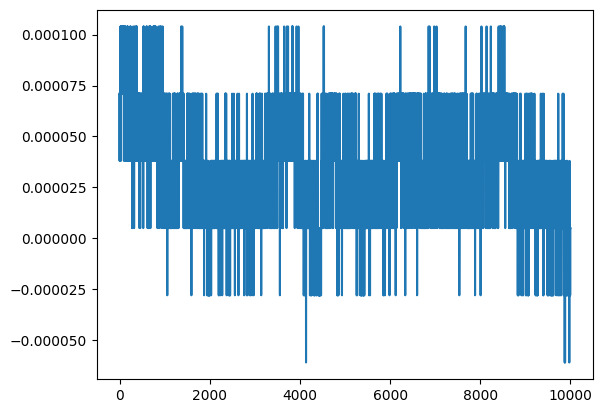

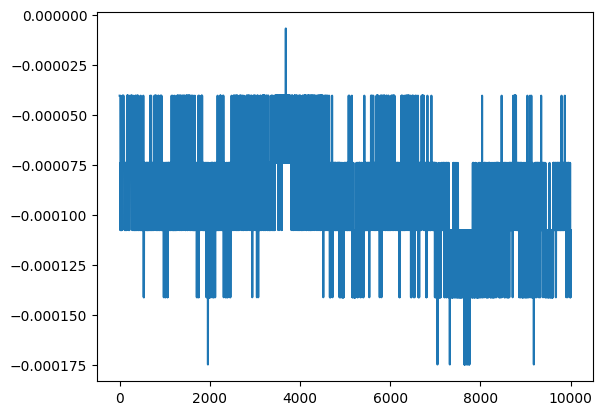

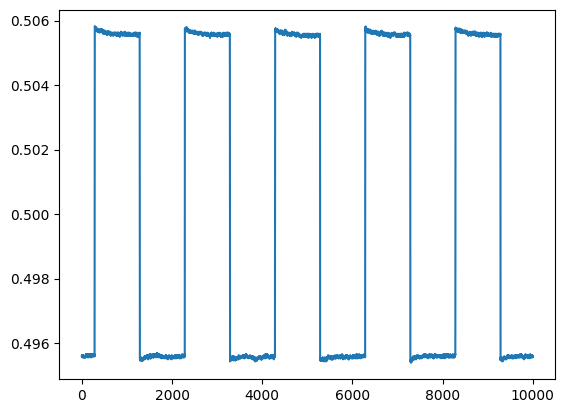

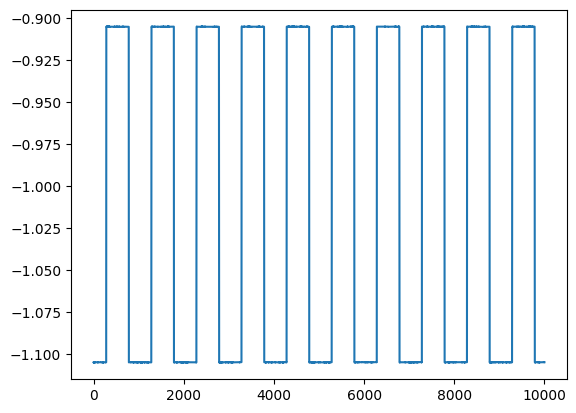

iteration finished
End time: 10.39909291267395
Starting acquisition 1718727802
Saving data
Writing time: -0.04431605339050293
Acquisition stopped by user


In [3]:
"""
   DWF Python Example
   Author:  Digilent, Inc.
   Revision:  2018-07-19

   Requires:                       
       Python 2.7, 3
"""
#load things
from ctypes import *
from dwfconstants import *
import math
import time
import matplotlib.pyplot as plt
import sys
import numpy as np
import csv
import os
import multiprocessing 
import save_functions as sf

if sys.platform.startswith("win"):
    dwf = cdll.dwf
elif sys.platform.startswith("darwin"):
    dwf = cdll.LoadLibrary("/Library/Frameworks/dwf.framework/dwf")
else:
    dwf = cdll.LoadLibrary("libdwf.so")

#declare ctype variables
hdwf = c_int()
sts = c_byte()


adq_frec = 1000
hzAcq = c_double(adq_frec)
record_time = 10 #s

save_csv = True

nSamples = int(record_time * adq_frec)
rgdSamples_channel1 = (c_double*nSamples)()
rgdSamples_channel2 = (c_double*nSamples)()
rgdSamples_channel3 = (c_double*nSamples)()
rgdSamples_channel4 = (c_double*nSamples)()

if nSamples > 32768.:
    print("Number of samples exceed oscilloscope buffer, lower the time, frequency or use Record function")
    quit()

version = create_string_buffer(16)
dwf.FDwfGetVersion(version)
print("DWF Version: "+str(version.value))

dwf.FDwfParamSet(DwfParamOnClose, c_int(0)) # 0 = run, 1 = stop, 2 = shutdown

#print(DWF version
version = create_string_buffer(16)
dwf.FDwfGetVersion(version)
print("DWF Version: "+str(version.value))


#open device
print("Opening first device")
dwf.FDwfDeviceOpen(c_int(-1), byref(hdwf))


if hdwf.value == hdwfNone.value:
    szerr = create_string_buffer(512)
    dwf.FDwfGetLastErrorMsg(szerr)
    print(str(szerr.value))
    print("failed to open device")
    quit()

   
dwf.FDwfDeviceAutoConfigureSet(hdwf, c_int(0)) # 0 = the device will only be configured when FDwf###Configure is called

#set up acquisition
dwf.FDwfAnalogInFrequencySet(hdwf, hzAcq)
dwf.FDwfAnalogInBufferSizeSet(hdwf, c_int(nSamples))
dwf.FDwfAnalogInChannelEnableSet(hdwf, c_int(-1), c_int(1))
dwf.FDwfAnalogInChannelRangeSet(hdwf, c_int(-1), c_double(5))
#dwf.FDwfAnalogInChannelFilterSet(hdwf, c_int(-1), filterAverage)

"""
filterDecimate 0 -> Store every Nth ADC conversion, where N = ADC frequency /acquisition frequency.
filterAverage 1 Store the average of N ADC conversions.
filterMinMax 2 Store interleaved, the minimum and maximum values, of 2xN conversions.
filterAverageFit 3 The stored samples match the specified range instead of the device input range options. This can improve the vertical resolution of the samples.
"""    

#set up range channel by channel
dwf.FDwfAnalogInChannelRangeSet(hdwf, c_int(0), c_double(0.2)) #1
dwf.FDwfAnalogInChannelRangeSet(hdwf, c_int(1), c_double(0.2)) #2
dwf.FDwfAnalogInChannelRangeSet(hdwf, c_int(2), c_double(0.05)) #3
dwf.FDwfAnalogInChannelRangeSet(hdwf, c_int(3), c_double(0.01)) #4


range1 = c_double()
range2 = c_double()
range3 = c_double()
range4 = c_double()

dwf.FDwfAnalogInChannelRangeGet(hdwf, 0, byref(range1))
dwf.FDwfAnalogInChannelRangeGet(hdwf, 1, byref(range2))
dwf.FDwfAnalogInChannelRangeGet(hdwf, 2, byref(range3))
dwf.FDwfAnalogInChannelRangeGet(hdwf, 3, byref(range4))

print("Range 1: ", range1)
print("Range 2: ", range2)
print("Range 3: ", range3)
print("Range 4: ", range4)

#set up offset channel by channel
dwf.FDwfAnalogInChannelOffsetSet(hdwf, c_int(0), c_double(0)) #1
dwf.FDwfAnalogInChannelOffsetSet(hdwf, c_int(1), c_double(0)) #2
dwf.FDwfAnalogInChannelOffsetSet(hdwf, c_int(2), c_double(0.5)) #3
dwf.FDwfAnalogInChannelOffsetSet(hdwf, c_int(3), c_double(-1))#4


#wait at least 2 seconds for the offset to stabilize
time.sleep(2)

print("Starting oscilloscope")
dwf.FDwfAnalogInConfigure(hdwf, c_int(1), c_int(1))

saving_directory = "Data/"

if __name__ == "__main__": 
    # creating multiprocessing Queue 
    q1 = multiprocessing.Queue(-1) 
    
    try:
        while True:
            start_time = time.time()

            print(f"Starting acquisition {int(start_time)}")
            # Perform an acquisition and write the data to the CSV file

            # Record the end time
            csv_name = saving_directory + "oscilloscope_data_" + str(int(start_time)) + "_ALL.csv"
            png_name = saving_directory + "oscilloscope_image_" + str(int(start_time)) + "_ALL.png"
        
            # creating new processes 
            p1 = multiprocessing.Process(target=sf.save_multi, args=(csv_name, adq_frec, q1,)) 

            while True:
                dwf.FDwfAnalogInStatus(hdwf, c_int(1), byref(sts))
                if sts.value == DwfStateDone.value :
                    break
                time.sleep(0.01)
            print("Acquisition done")

            dwf.FDwfAnalogInStatusData(hdwf, 0, rgdSamples_channel1, nSamples) # get channel 1 data
            dwf.FDwfAnalogInStatusData(hdwf, 1, rgdSamples_channel2, nSamples) # get channel 2 data
            dwf.FDwfAnalogInStatusData(hdwf, 2, rgdSamples_channel3, nSamples) # get channel 3 data
            dwf.FDwfAnalogInStatusData(hdwf, 3, rgdSamples_channel4, nSamples) # get channel 4 data

            
            py_data = [list(rgdSamples_channel1), list(rgdSamples_channel2), list(rgdSamples_channel3), list(rgdSamples_channel4)]
            if save_csv:
                q1.put(py_data)
                p1.start()
            
            print(f"Acquisition {start_time} completed")


            print("Plotting")
            py_data = list(rgdSamples_channel1)
            plt.plot(np.fromiter(py_data, dtype = float))
            plt.show()
            
            py_data = list(rgdSamples_channel2)
            plt.plot(np.fromiter(py_data, dtype = float))
            plt.show()
            
            py_data = list(rgdSamples_channel3)
            plt.plot(np.fromiter(py_data, dtype = float))
            plt.show()
            
            py_data = list(rgdSamples_channel4)
            plt.plot(np.fromiter(py_data, dtype = float))
            plt.show()
            
            
            end_time = time.time()
            
            print("iteration finished")
        
            # Calculate the time difference
            end_time = time.time()
            print("End time:", end_time - start_time)
        
        
    except KeyboardInterrupt:
        print("Acquisition stopped by user")
        dwf.FDwfAnalogOutReset(hdwf, c_int(0))
        dwf.FDwfDeviceCloseAll()
        
